In [1]:

import os
import torch
from transformers import Trainer, TrainingArguments, AutoTokenizer, AutoModel, pipeline, AutoModelForSequenceClassification
import numpy as np
from datasets import Dataset, load_metric
import pandas as pd
from transformers import TextClassificationPipeline

In [2]:
model_name = 'bert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(model_name, padding=True, truncation=True)
model = AutoModelForSequenceClassification.from_pretrained('../../../Files/models/bert_base_cased_model/fully_trained/checkpoint-3237/')

classifier = TextClassificationPipeline(model=model, tokenizer=tokenizer)


In [3]:
test = pd.read_pickle('../../../Files/Comments/train/test_split_comments.pickle')



In [4]:
testlist = []
for i,j in test.iterrows():
    testlist.append(j['cleanBody'])

In [5]:
results = classifier(testlist[:100], top_k=3)

In [7]:
test[0:100]['label'].values

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 2,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [8]:
test2 = test[0:100]

In [6]:
results

[[{'label': 'LABEL_1', 'score': 0.9958221912384033},
  {'label': 'LABEL_2', 'score': 0.00371171603910625},
  {'label': 'LABEL_0', 'score': 0.00046611326979473233}],
 [{'label': 'LABEL_1', 'score': 0.8922913670539856},
  {'label': 'LABEL_0', 'score': 0.06190100684762001},
  {'label': 'LABEL_2', 'score': 0.04580756649374962}],
 [{'label': 'LABEL_2', 'score': 0.39818114042282104},
  {'label': 'LABEL_1', 'score': 0.33800938725471497},
  {'label': 'LABEL_0', 'score': 0.26380953192710876}],
 [{'label': 'LABEL_1', 'score': 0.9936386942863464},
  {'label': 'LABEL_2', 'score': 0.005611531436443329},
  {'label': 'LABEL_0', 'score': 0.0007498113554902375}],
 [{'label': 'LABEL_1', 'score': 0.9423483610153198},
  {'label': 'LABEL_2', 'score': 0.05142098665237427},
  {'label': 'LABEL_0', 'score': 0.006230669096112251}],
 [{'label': 'LABEL_1', 'score': 0.983226478099823},
  {'label': 'LABEL_2', 'score': 0.011175542138516903},
  {'label': 'LABEL_0', 'score': 0.005597958341240883}],
 [{'label': 'LABEL_

In [13]:
model_name = 'bert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(model_name, padding="max_length", truncation=True)

def tokenize_function(examples):
    return tokenizer(examples, padding="max_length", truncation=True)

In [14]:
model = AutoModelForSequenceClassification.from_pretrained('../../../Files/models/bert_base_cased_model/fully_trained/checkpoint-3237/')

In [15]:
from transformers import TextClassificationPipeline

In [16]:
classifier = TextClassificationPipeline(model=model, tokenizer=tokenizer)

In [50]:
results = classifier(testlist[:100], top_k=2)

In [9]:
results[0]

[{'label': 'LABEL_1', 'score': 0.9958221912384033},
 {'label': 'LABEL_2', 'score': 0.00371171603910625},
 {'label': 'LABEL_0', 'score': 0.00046611326979473233}]

In [10]:
for i, j in test2.iterrows():
    test2.at[i, 'pred_1'] = np.int64(results[i][0]['label'][-1])
    test2.at[i, 'conf_1'] = results[i][0]['score']
    test2.at[i, 'pred_2'] = np.int64(results[i][1]['label'][-1])
    test2.at[i, 'conf_2'] = results[i][1]['score']

/var/folders/fh/yf9jwszj6d5_1_xhfz_l6k000000gn/T/ipykernel_51638/4264278197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.at[i, 'pred_1'] = np.int64(results[i][0]['label'][-1])
/var/folders/fh/yf9jwszj6d5_1_xhfz_l6k000000gn/T/ipykernel_51638/4264278197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.at[i, 'conf_1'] = results[i][0]['score']
/var/folders/fh/yf9jwszj6d5_1_xhfz_l6k000000gn/T/ipykernel_51638/4264278197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [17]:
test2.loc[ test['label'] == 1, 'label'] = 4
test2.loc[ test['label'] == 0, 'label'] = 1
test.loc[ test['label'] == 4, 'label'] = 0

In [14]:
import pandas as pd
import xgboost as xbg
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def plot_results(y_test, y_pred, model ):
    acc = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average='macro')
    y_pred_onehot = pd.get_dummies(y_pred)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_onehot, multi_class='ovo')
    print('Model performance for {model}'.format(model=model))
    print('------------------------------------------------')
    print('Accuracy is ', acc)
    print('F1 is ', f1)
    print('ROC AUC Score is ', roc_auc)
    print('------------------------------------------------')

    metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()
    df = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))
    df2 = df.div(df.sum(axis=1), axis=0)
    ax = sns.heatmap(df2)
    ax.set(xlabel='Predicted', ylabel='Actual', title=f'Confusion Matrix for {model}')
    plt.show()

Model performance for BERT
------------------------------------------------
Accuracy is  0.7
F1 is  0.6606848628125224
ROC AUC Score is  0.7680436117936118
------------------------------------------------


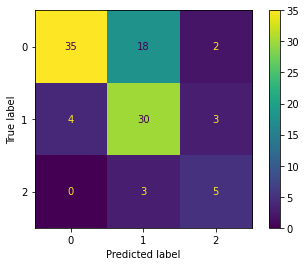

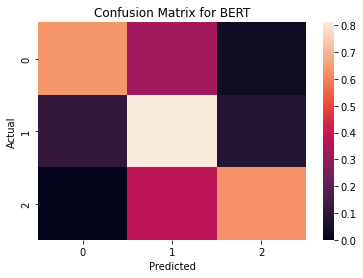

In [18]:
plot_results(test2['label'], test2['pred_1'], 'BERT')

### SLOW WAY, don't look here

In [66]:
from tqdm import tqdm
predictions = []
for i in tqdm(range(len(test))):
    predictions.append(classifier(test[i]))

  0%|          | 3500/1408474 [04:49<32:17:12, 12.09it/s] 


KeyboardInterrupt: 